In [10]:
# Instalação das bibliotecas
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Criação do DF
countries_info_df = pd.read_csv(r"C:\Users\Marcelo Cabral\OneDrive\Documentos\Estudos\Data_Engineering\covid19-pipeline\data\raw\country_wise_latest.csv")
countries_info_df.dtypes

Country/Region             object
Confirmed                   int64
Deaths                      int64
Recovered                   int64
Active                      int64
New cases                   int64
New deaths                  int64
New recovered               int64
Deaths / 100 Cases        float64
Recovered / 100 Cases     float64
Deaths / 100 Recovered    float64
Confirmed last week         int64
1 week change               int64
1 week % increase         float64
WHO Region                 object
dtype: object

In [5]:
countries_info_df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [16]:
countries_info_df.columns = [
    "Country", "Confirmed", "Deaths", "Recovered", "Active",
    "New cases", "New deaths", "New recovered",
    "Deaths / 100 Cases", "Recovered / 100 Cases",
    "Deaths / 100 Recovered", "Confirmed last week",
    "1 week change", "1 week % increase", "Region"
]
countries_info_df.head()

,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [17]:
countries = countries_info_df["Country"]
countries.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland',
       'Grenada', 'Guatemala', 'Guinea', 'G

In [18]:
# Casos de recuperação por país
countries_recovers = countries_info_df.loc[countries_info_df["Recovered"] > 0]
sorted_countries_recovers_df = countries_recovers.sort_values(by="Recovered", ascending=False) 
print(sorted_countries_recovers_df[["Country", "Recovered"]])

                   Country  Recovered
23                  Brazil    1846641
173                     US    1325804
79                   India     951166
138                 Russia     602249
35                   Chile     319954
..                     ...        ...
140  Saint Kitts and Nevis         15
68               Greenland         13
75                Holy See         12
130       Papua New Guinea         11
183         Western Sahara          8

[181 rows x 2 columns]


In [19]:
# Casos de óbitos por país
countries_deaths = countries_info_df.loc[countries_info_df["Deaths"] > 0]
sorted_countries_deaths_df = countries_deaths.sort_values(by="Deaths", ascending=False) 
print(sorted_countries_deaths_df[["Country", "Deaths"]])

            Country  Deaths
173              US  148011
23           Brazil   87618
177  United Kingdom   45844
111          Mexico   44022
85            Italy   35112
..              ...     ...
22         Botswana       2
174          Uganda       2
28          Burundi       1
100   Liechtenstein       1
183  Western Sahara       1

[170 rows x 2 columns]


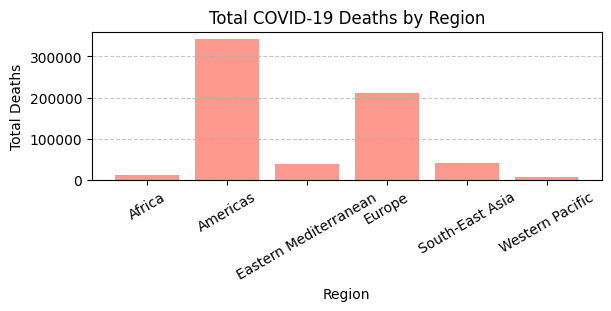

In [20]:
deaths_by_region = countries_info_df.groupby("Region")["Deaths"].sum()

fig, ax = plt.subplots(figsize=(6, 3), layout='constrained')
ax.bar(deaths_by_region.index, deaths_by_region.values, color='salmon', alpha=0.8)

ax.set_xlabel('Region')
ax.set_ylabel('Total Deaths')
ax.set_title('Total COVID-19 Deaths by Region')
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=30)
plt.show()

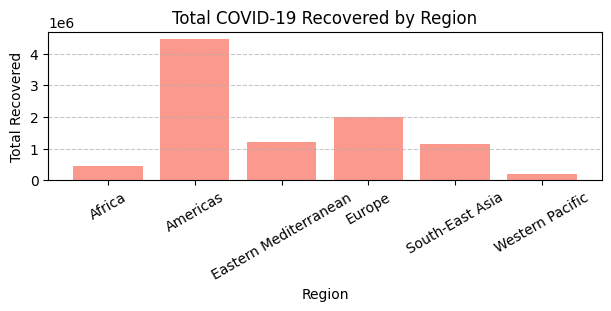

In [44]:
recover_by_region = countries_info_df.groupby("Region")["Recovered"].sum()

fig, ax = plt.subplots(figsize=(6, 3), layout='constrained')
ax.bar(recover_by_region.index, recover_by_region.values, color='salmon', alpha=0.8)

ax.set_xlabel('Region')
ax.set_ylabel('Total Recovered')
ax.set_title('Total COVID-19 Recovered by Region')
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=30)
plt.show()

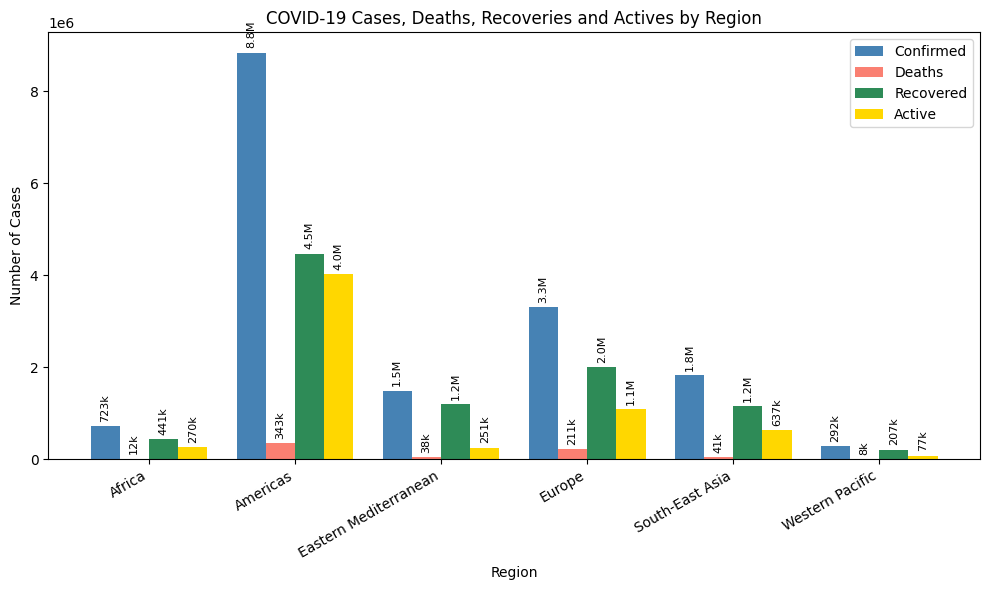

In [43]:
region_summary = countries_info_df.groupby("Region")[["Confirmed", "Deaths", "Recovered", "Active"]].sum().reset_index()

regions = region_summary["Region"]
confirmed = region_summary["Confirmed"]
deaths = region_summary["Deaths"]
recovered = region_summary["Recovered"]
actives = region_summary["Active"]

x = np.arange(len(regions))
width = 0.20

fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(x - 1.5*width, confirmed, width, label="Confirmed", color='steelblue')
bars2 = ax.bar(x - 0.5*width, deaths, width, label="Deaths", color='salmon')
bars3 = ax.bar(x + 0.5*width, recovered, width, label="Recovered", color='seagreen')
bars4 = ax.bar(x + 1.5*width, actives, width, label="Active", color='gold')

ax.set_xlabel("Region")
ax.set_ylabel("Number of Cases")
ax.set_title("COVID-19 Cases, Deaths, Recoveries and Actives by Region")
ax.set_xticks(x)
ax.set_xticklabels(regions, rotation=30, ha='right')
ax.legend()

# Função para formatar números automaticamente
def format_number(value):
    if value >= 1_000_000:
        return f"{value/1_000_000:.1f}M"
    elif value >= 1_000:
        return f"{value/1_000:.0f}k"
    else:
        return str(int(value))

# Adiciona rótulos formatados acima das barras
ax.bar_label(bars1, labels=[format_number(v) for v in confirmed], padding=3, fontsize=8, rotation=90)
ax.bar_label(bars2, labels=[format_number(v) for v in deaths], padding=3, fontsize=8, rotation=90)
ax.bar_label(bars3, labels=[format_number(v) for v in recovered], padding=3, fontsize=8, rotation=90)
ax.bar_label(bars4, labels=[format_number(v) for v in actives], padding=3, fontsize=8, rotation=90)

plt.tight_layout()
plt.show()